In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [2]:
basedir = Path().resolve().parent
datadir = basedir / 'data'

In [3]:
train = pd.read_csv(datadir / 'train.csv')
train["RC"] = train["R"].astype(str) + '_' + train["C"].astype(str)
train.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure,RC
0,1,1,20,50,0.000000,0.083334,0,5.837492,20_50
1,2,1,20,50,0.033652,18.383041,0,5.907794,20_50
2,3,1,20,50,0.067514,22.509278,0,7.876254,20_50
3,4,1,20,50,0.101542,22.808822,0,11.742872,20_50
4,5,1,20,50,0.135756,25.355850,0,12.234987,20_50


In [5]:
train["kfold"] = -1

SEED = 42
N_SPLITS = 10

bids = train.breath_id.unique()

kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED)

for fold, (_, valid_idx) in enumerate(kf.split(bids)):
    valid_bids = bids[valid_idx]
    train.loc[train["breath_id"].isin(valid_bids), "kfold"] = fold

In [9]:
train.to_csv(datadir / f"train_RC_kfold{N_SPLITS}_seed{SEED}.csv")

In [16]:
u_outs = (1 - train.u_out.values.reshape(-1, 80))
insp_lens = u_outs.sum(axis=1)

(array([1.0000e+01, 3.0000e+00, 0.0000e+00, 0.0000e+00, 1.2300e+02,
        2.2803e+04, 0.0000e+00, 1.8260e+04, 1.7923e+04, 1.6328e+04]),
 array([25. , 25.7, 26.4, 27.1, 27.8, 28.5, 29.2, 29.9, 30.6, 31.3, 32. ]),
 <BarContainer object of 10 artists>)

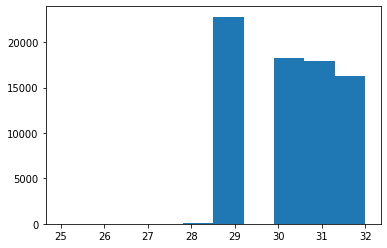

In [17]:
plt.hist(insp_lens)

In [18]:
test = pd.read_csv(datadir / 'test.csv')

(array([3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.5000e+01,
        1.5137e+04, 0.0000e+00, 1.2171e+04, 1.1921e+04, 1.0983e+04]),
 array([25. , 25.7, 26.4, 27.1, 27.8, 28.5, 29.2, 29.9, 30.6, 31.3, 32. ]),
 <BarContainer object of 10 artists>)

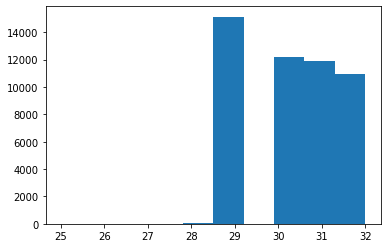

In [19]:
u_outs = (1 - test.u_out.values.reshape(-1, 80))
insp_lens = u_outs.sum(axis=1)

plt.hist(insp_lens)

In [34]:
train["count"] = (np.arange(train.shape[0]) % 80).astype(int)